# Numerical integration

In [1]:
import matplotlib.pyplot as plt
import numpy as np

The numerical integration of functions is a way to approximately calculate the value of an integral. There are several numerical integration methods:

- Rule of trapezios
- Simpson rule
- Quadratures

etc

## Trapezios

The way to approximate an integral by the Trapepecios method is to divide the domain of the integral into equal sectors, and approximate the integral into each one by a trapeze.
Suppose we have to evaluate the integral:

$$ \ int_0^{\ pi} \ without (x) dx $$

whose analytical result is:
$$ \ int_0^{\ pi} \ Sin (x) dx = -\ cos (x) \ Big | _0^{\ pi} $$

$$ = - (\ cos (\ pi) - \ cos (0)) $$

$$ = -( -1 -1) $$

$$ = 2 $$


<div>
<img src="attachment:trap.png" width="300"/>
</div>


If we divide the $ x $ domain at $ x_0, x_1, \ cdots, x_n $ the area of ​​a base trapezoid $ x_ {k-1}, x_k $ and heights $ f (x_ {k-1}) $ and $ f (x_k) $ is 

$$
Area = \ overbrace {\ fraud {f (x_ {k-1}) + f (x_k)} {2}}^{height \, average} \, \, \ overbrace {\ delta x}^{base}
$$

Adding on all sectors:

$$
\ int_a^b f (x) dx \ approx \ fraud {f (x_0) + f (x_1)} {2} \ delta x + \ fraud {f (x_1) + f (x_2)} {2} \ delta x + \ cdots + \ fraud {f (x_ {n f (x_n)} {2} \ Delta x
$$

O sea

$$
\int_a^b f(x)dx \approx \sum_{k=1}^N \frac{f(x_{k-1}) + f(x_k)}{2} \Delta x
$$


In [2]:
def trap(f, x):
    """
    computes the integral of f using trapezoid rule
    """
    area = 0
    N = len(x)
    dx = x[1] - x[0]
    
    for k in range(1, N):
        area += (f(x[k - 1]) + f(x[k])) * dx / 2
        
    return area

In [3]:
def f(x):
    return np.sin(x)


x = np.linspace(0, np.pi, 40)
# print(x)
trap(f, x)

np.float64(1.9989184010578636)

Here is what the approach would be like

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'svg'
plt.rcParams['figure.figsize'] = (13, 8)
plt.rcParams.update({'font.size': 19})

def f(x):
    return np.sin(x)

def trap_plot(n_points):
    x = np.linspace(0, np.pi, 1000)          # continuous
    x_i = np.linspace(0, np.pi, n_points)    # discrete

    plt.plot(x, f(x), label=r'$\sin(x)$')
    plt.plot(x_i, f(x_i), '-o', label=r'$Trap$ ({})'.format(n_points))
    plt.fill(x_i, f(x_i), color='C1', alpha=0.15)
    plt.vlines(x_i, 0, f(x_i), color='C1', linestyle=':')
    plt.xticks(x_i, [r'$x_{}$'.format(n) for n in range(n_points)])
    plt.yticks([0, 1], ['$0$', '$1$'])
    plt.legend(loc='best')
    plt.ylim(0, 1.05)
    plt.show()

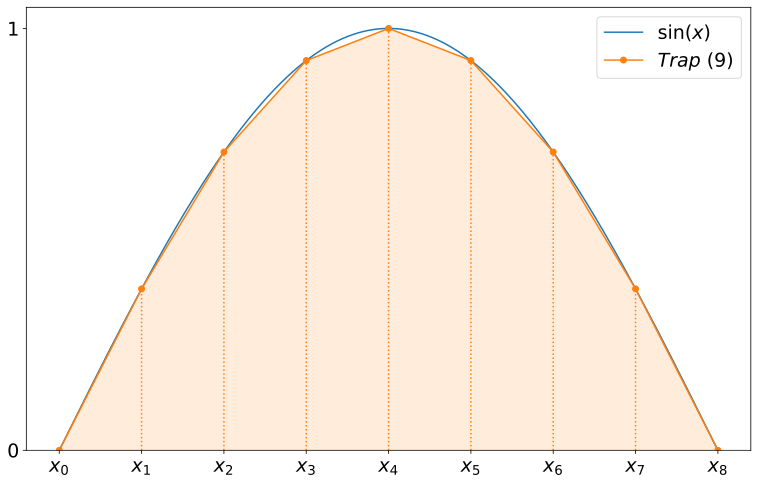

In [5]:
trap_plot(9)

You can also calculate the average quadratic error of the approach depending on the number of points used

In [6]:
plt.rcParams['figure.figsize'] = (11, 6)
def plot_error(n_points):
    for n in range(2, n_points):
        x = np.linspace(0, np.pi, n)
        plt.plot(n - 1, (trap(f, x) - 2) ** 2, 'bo')

        plt.axhline(0, color='black', lw=1)
        plt.xlabel('# of trapezios')
        plt.ylabel('error')
    plt.show()

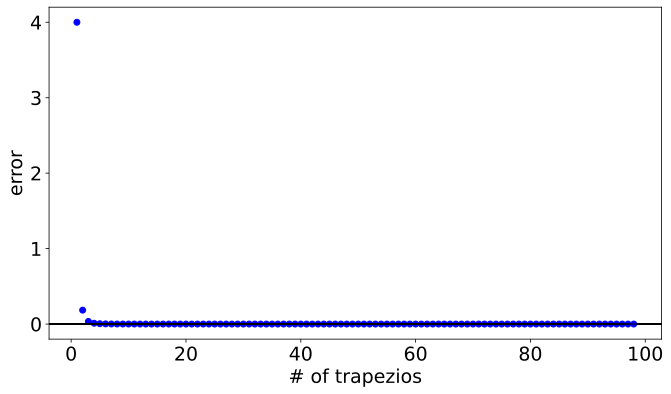

In [7]:
plot_error(100)

## Simpson rule

The Simpson rule is similar to that of trapezios, although a quadratic function is used to approximate the integral in the region $ x_ {k-1}, x_k, x_ {k+1} $

$$
\ int_a^b f (x) dx \ approx \ fraud
$$

Notice that an odd number of abscissa is always needed.

## Quadratures

The numerical evaluation of integrals in quadratures is to use a heavy sum of the function evaluated in certain particular abscissa, which are obtained from *orthogonal polynomials *. 

In general:

$$
\ int_a^b f (x) dx \ approx \ sum_ {k = 1}^n w_k f (x_k)
$$

where both pesos $ w_k $ and the abscissa $ x_k $ are given in tables (or functions that calculate them). Fortunately, `Scipy` comes in our aid [con el módulo `integrate`](https://docs.scipy.org/doc/scipy/reference/integrate.html).

In [8]:
from scipy.integrate import quad

ModuleNotFoundError: No module named 'scipy'

In [9]:
def f(x):
    return np.sin(x)

val, abserr = quad(f, 0, np.pi)
print("integral value =", val, ", absolute error =", abserr)

NameError: name 'quad' is not defined